In [1]:
pip install pandas sqlalchemy pymysql


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Loding the Data
products_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Products.csv", encoding='ISO-8859-1')

In [3]:
products_df.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [4]:
products_df.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [5]:
# Convert 'Unit Cost USD' and 'Unit Price USD' to numeric, removing any non-numeric characters
products_df['Unit Cost USD'] = pd.to_numeric(products_df['Unit Cost USD'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
products_df['Unit Price USD'] = pd.to_numeric(products_df['Unit Price USD'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

# Check for any conversion issues
print(products_df[['Unit Cost USD', 'Unit Price USD']].isnull().sum())


Unit Cost USD     0
Unit Price USD    0
dtype: int64


In [6]:
# Check for duplicates
duplicates = products_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    products_df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [7]:
# Summary statistics
print(products_df.describe(include='all'))

# Check unique values in categorical columns
print(products_df['Brand'].unique())
print(products_df['Category'].unique())


         ProductKey                         Product Name    Brand  Color  \
count   2517.000000                                 2517     2517   2517   
unique          NaN                                 2517       11     16   
top             NaN  Contoso In-Line Coupler E180 Silver  Contoso  Black   
freq            NaN                                    1      710    602   
mean    1259.000000                                  NaN      NaN    NaN   
std      726.739637                                  NaN      NaN    NaN   
min        1.000000                                  NaN      NaN    NaN   
25%      630.000000                                  NaN      NaN    NaN   
50%     1259.000000                                  NaN      NaN    NaN   
75%     1888.000000                                  NaN      NaN    NaN   
max     2517.000000                                  NaN      NaN    NaN   

        Unit Cost USD  Unit Price USD  SubcategoryKey            Subcategory  \
count  

In [8]:
# Example: Merging with sales data
# Load sales data
sales_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Sales.csv", encoding='ISO-8859-1')

# Merge products with sales data
# Assuming 'ProductKey' is the key in products_df and 'ProductID' in sales_df
merged_df = pd.merge(products_df, sales_df, left_on='ProductKey', right_on='ProductKey', how='left')

# Check the merged dataframe
print(merged_df.info())
print(merged_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62909 entries, 0 to 62908
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      62909 non-null  int64  
 1   Product Name    62909 non-null  object 
 2   Brand           62909 non-null  object 
 3   Color           62909 non-null  object 
 4   Unit Cost USD   62909 non-null  float64
 5   Unit Price USD  62909 non-null  float64
 6   SubcategoryKey  62909 non-null  int64  
 7   Subcategory     62909 non-null  object 
 8   CategoryKey     62909 non-null  int64  
 9   Category        62909 non-null  object 
 10  Order Number    62884 non-null  float64
 11  Line Item       62884 non-null  float64
 12  Order Date      62884 non-null  object 
 13  Delivery Date   13165 non-null  object 
 14  CustomerKey     62884 non-null  float64
 15  StoreKey        62884 non-null  float64
 16  Quantity        62884 non-null  float64
 17  Currency Code   62884 non-null 

In [9]:
merged_df.dropna(subset=['Order Number', 'Line Item', 'Order Date', 'Quantity'], inplace=True)
merged_df['Delivery Date'].fillna('Not Delivered', inplace=True)  # Example for categorical data
merged_df['Quantity'].fillna(0, inplace=True)  # Assuming zero sales for missing quantities
print(merged_df.isnull().sum())


ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
StoreKey          0
Quantity          0
Currency Code     0
dtype: int64


In [10]:
import pandas as pd
# Convert 'Order Date' and 'Delivery Date' to datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')
merged_df['Delivery Date'] = pd.to_datetime(merged_df['Delivery Date'], errors='coerce')

# Check conversion
print(merged_df[['Order Date', 'Delivery Date']].dtypes)


Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
dtype: object


In [11]:
merged_df['Sales Amount'] = merged_df['Unit Price USD'] * merged_df['Quantity']
total_sales = merged_df['Sales Amount'].sum()
print(f"Total Sales Amount: {total_sales}")


Total Sales Amount: 55755479.59


In [12]:
sales_by_category = merged_df.groupby('Category')['Sales Amount'].sum().reset_index()
print(sales_by_category.sort_values(by='Sales Amount', ascending=False))


                        Category  Sales Amount
3                      Computers   19301595.46
5                Home Appliances   10795478.59
1         Cameras and camcorders    6520168.02
2                    Cell phones    6183791.22
7                   TV and Video    5928982.69
0                          Audio    3169627.74
6  Music, Movies and Audio Books    3131006.44
4                 Games and Toys     724829.43


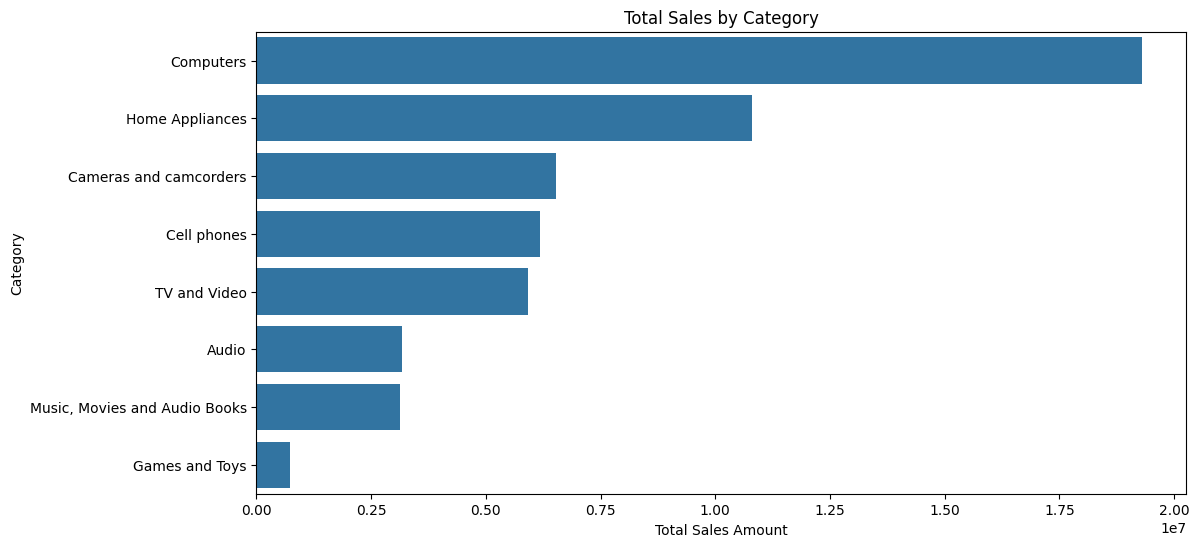

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize Sales by Category

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Amount', y='Category', data=sales_by_category.sort_values(by='Sales Amount', ascending=False))
plt.title('Total Sales by Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()


In [14]:
# 1. Product Popularity

# Calculate total sales per product
merged_df['Sales Amount'] = merged_df['Unit Price USD'] * merged_df['Quantity']

# Group by 'Product Name' and sum the sales amount
popularity_df = merged_df.groupby('Product Name')['Sales Amount'].sum().reset_index()

# Identify the most and least popular products
most_popular = popularity_df.sort_values(by='Sales Amount', ascending=False).head(10)
least_popular = popularity_df.sort_values(by='Sales Amount').head(10)

print("Most Popular Products:")
print(most_popular)

print("\nLeast Popular Products:")
print(least_popular)


Most Popular Products:
                                     Product Name  Sales Amount
2381               WWI Desktop PC2.33 X2330 Black     505450.00
246   Adventure Works Desktop PC2.33 XD233 Silver     466089.00
245    Adventure Works Desktop PC2.33 XD233 Brown     464151.00
244    Adventure Works Desktop PC2.33 XD233 Black     447678.00
247    Adventure Works Desktop PC2.33 XD233 White     437019.00
2384               WWI Desktop PC2.33 X2330 White     424578.00
2382               WWI Desktop PC2.33 X2330 Brown     422740.00
177       Adventure Works 52" LCD HDTV X590 White     394398.64
174       Adventure Works 52" LCD HDTV X590 Black     374098.71
2383              WWI Desktop PC2.33 X2330 Silver     360248.00

Least Popular Products:
                                           Product Name  Sales Amount
2162                      SV USB Data Cable E600 Silver         15.20
2165               SV USB Sync Charge Cable E700 Silver         15.92
1335  Litware 80mm Dual Ball Bearing C

In [15]:
# 2. Profitability Analysis

# Calculate profit per product
merged_df['Profit'] = merged_df['Unit Price USD'] - merged_df['Unit Cost USD']

# Group by 'Product Name' and sum the profits
profitability_df = merged_df.groupby('Product Name')['Profit'].sum().reset_index()

# Identify products with the highest and lowest profits
most_profitable = profitability_df.sort_values(by='Profit', ascending=False).head(10)
least_profitable = profitability_df.sort_values(by='Profit').head(10)

print("Most Profitable Products:")
print(most_profitable)

print("\nLeast Profitable Products:")
print(least_profitable)


Most Profitable Products:
                                     Product Name    Profit
244    Adventure Works Desktop PC2.33 XD233 Black  97840.45
2381               WWI Desktop PC2.33 X2330 Black  94636.08
246   Adventure Works Desktop PC2.33 XD233 Silver  94600.70
245    Adventure Works Desktop PC2.33 XD233 Brown  93304.80
2382               WWI Desktop PC2.33 X2330 Brown  92792.52
247    Adventure Works Desktop PC2.33 XD233 White  92008.90
2383              WWI Desktop PC2.33 X2330 Silver  87261.84
174       Adventure Works 52" LCD HDTV X590 Black  85323.48
2384               WWI Desktop PC2.33 X2330 White  80502.12
177       Adventure Works 52" LCD HDTV X590 White  77566.80

Least Profitable Products:
                                           Product Name  Profit
2162                      SV USB Data Cable E600 Silver    2.35
2160                        SV USB Data Cable E600 Grey    2.82
2165               SV USB Sync Charge Cable E700 Silver    3.92
2161                        SV

In [16]:
# 3. Category Analysis

# Group by 'Category' and sum the sales amount
category_sales_df = merged_df.groupby('Category')['Sales Amount'].sum().reset_index()

# Sort categories by sales amount
category_sales_df = category_sales_df.sort_values(by='Sales Amount', ascending=False)

print("Sales Performance by Category:")
print(category_sales_df)

# Optionally, analyze by subcategory as well
subcategory_sales_df = merged_df.groupby('Subcategory')['Sales Amount'].sum().reset_index()
subcategory_sales_df = subcategory_sales_df.sort_values(by='Sales Amount', ascending=False)

print("\nSales Performance by Subcategory:")
print(subcategory_sales_df)


Sales Performance by Category:
                        Category  Sales Amount
3                      Computers   19301595.46
5                Home Appliances   10795478.59
1         Cameras and camcorders    6520168.02
2                    Cell phones    6183791.22
7                   TV and Video    5928982.69
0                          Audio    3169627.74
6  Music, Movies and Audio Books    3131006.44
4                 Games and Toys     724829.43

Sales Performance by Subcategory:
                         Subcategory  Sales Amount
9                           Desktops    9906356.50
27                       Televisions    4308719.19
23              Projectors & Screens    3767522.00
31                     Water Heaters    3547822.50
3                         Camcorders    3357990.00
17                           Laptops    3164777.20
21                         Movie DVD    3131006.44
28               Touch Screen Phones    3083462.00
26               Smart phones & PDAs    2805657.00
2

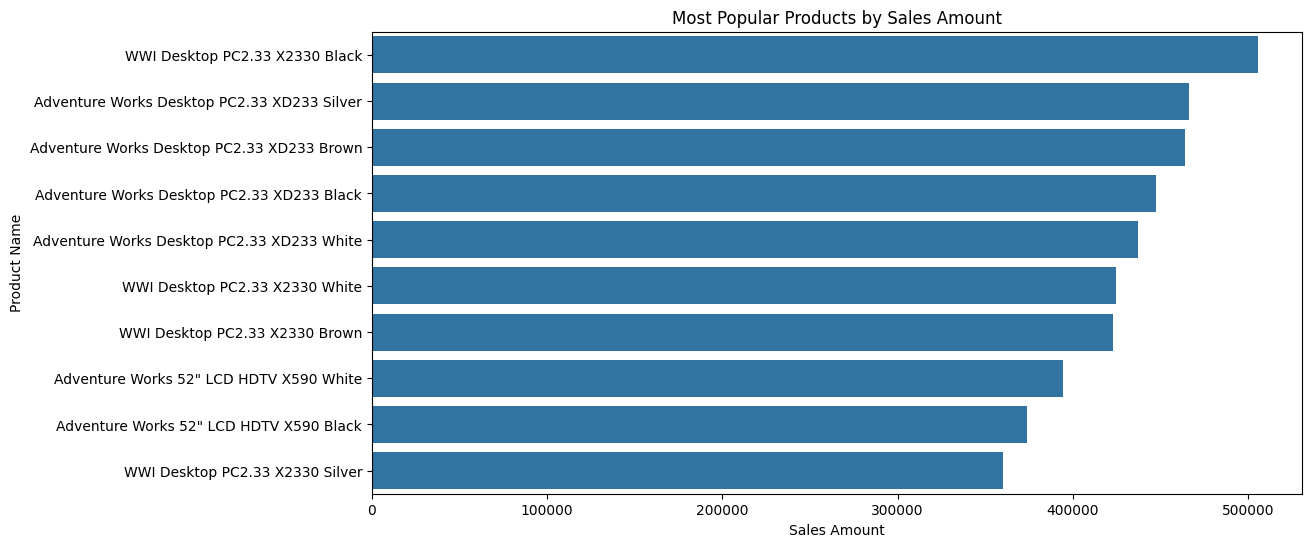

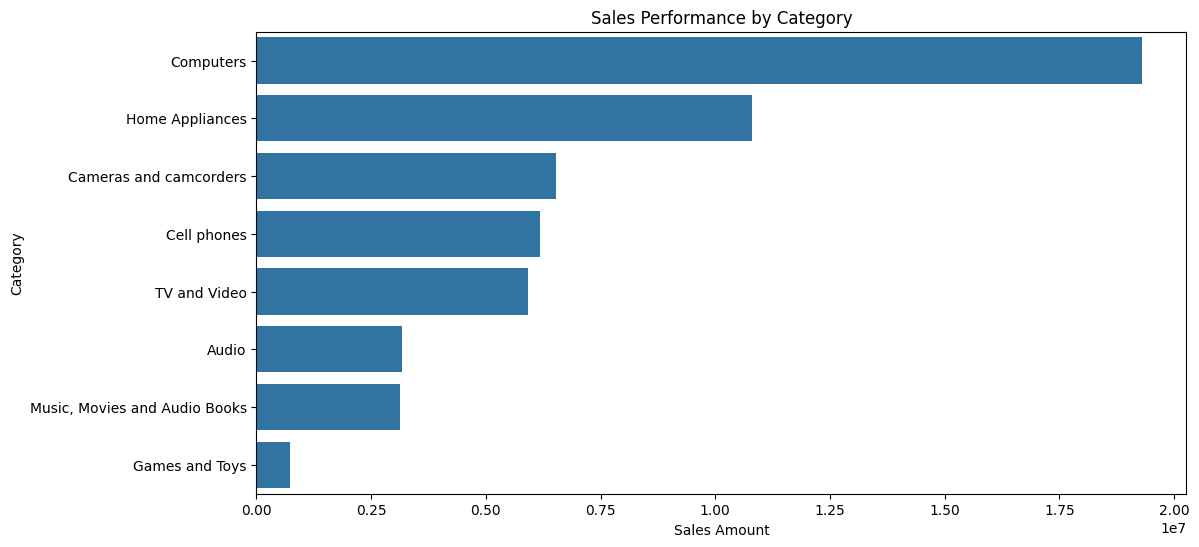

In [17]:
# Visualizing product popularity
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Amount', y='Product Name', data=most_popular)
plt.title('Most Popular Products by Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Product Name')
plt.show()

# Visualizing category sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales Amount', y='Category', data=category_sales_df)
plt.title('Sales Performance by Category')
plt.xlabel('Sales Amount')
plt.ylabel('Category')
plt.show()


In [28]:
import pandas as pd

# Define the path for saving the combined CSV file
output_path = r"D:\PROJECTS\EDA\Cleanned Data\products_analysis.csv"

# Concatenate all DataFrames into one (you may need to adjust based on your data structure)
combined_df = pd.concat([
    merged_df,
    sales_by_category,
    most_popular,
    least_popular,
    most_profitable,
    least_profitable,
    category_sales_df,
    subcategory_sales_df
], keys=[
    'Merged Data',
    'Sales by Category',
    'Most Popular Products',
    'Least Popular Products',
    'Most Profitable Products',
    'Least Profitable Products',
    'Category Sales',
    'Subcategory Sales'
]).reset_index(level=0)

# Save the combined DataFrame to a single CSV file
combined_df.to_csv(output_path, index=False)

print(f"Data successfully saved to {output_path}")


Data successfully saved to D:\PROJECTS\EDA\Cleanned Data\products_analysis.csv


In [29]:
combined_df

,level_0,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,...,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,Quantity,Currency Code,Sales Amount,Profit
0,Merged Data,1.0,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101.0,MP4&MP3,1.0,...,493001.0,3.0,2016-05-07,2016-05-14,453993.0,0.0,1.0,EUR,12.99,6.37
1,Merged Data,1.0,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101.0,MP4&MP3,1.0,...,728016.0,1.0,2016-12-28,NaT,1513119.0,47.0,1.0,USD,12.99,6.37
2,Merged Data,1.0,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101.0,MP4&MP3,1.0,...,891001.0,1.0,2017-06-09,2017-06-13,741381.0,0.0,1.0,EUR,12.99,6.37
3,Merged Data,1.0,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101.0,MP4&MP3,1.0,...,1025004.0,4.0,2017-10-21,NaT,2028962.0,56.0,8.0,USD,103.92,6.37
4,Merged Data,1.0,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101.0,MP4&MP3,1.0,...,1053003.0,3.0,2017-11-18,NaT,1579183.0,50.0,3.0,USD,38.97,6.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Subcategory Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computers Accessories,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,211345.76,NaN
14,Subcategory Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home & Office Phones,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,165723.88,NaN
6,Subcategory Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cell phones Accessories,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,128948.34,NaN
13,Subcategory Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fans,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,99370.50,NaN


In [32]:
from sqlalchemy import create_engine

# Database connection details
user = 'root'
password = 'Krishna3_6_9'
host = '127.0.0.1'
database = 'Datas'

# Create a database connection
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'
engine = create_engine(connection_string)

# Store the purchase_summary DataFrame to the database
combined_df.to_sql('products_analysis', con=engine, index=False, if_exists='replace')

print("Data successfully stored in the MySQL database.")


Data successfully stored in the MySQL database.


In [31]:
combined_df.dtypes

level_0                   object
ProductKey               float64
Product Name              object
Brand                     object
Color                     object
Unit Cost USD            float64
Unit Price USD           float64
SubcategoryKey           float64
Subcategory               object
CategoryKey              float64
Category                  object
Order Number             float64
Line Item                float64
Order Date        datetime64[ns]
Delivery Date     datetime64[ns]
CustomerKey              float64
StoreKey                 float64
Quantity                 float64
Currency Code             object
Sales Amount             float64
Profit                   float64
dtype: object